In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/trab1/cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv')

In [5]:
list_drop_columns = ['grau',
                     'turno',
                     'nome',
                     'curso_id',
                     'nota_parcial_ampla',
                     'nota_parcial_cotas',
                     'nota_integral_ampla',
                     'nota_integral_cotas',
                     'mensalidade',
                     'cidade_busca',
                     'uf_busca',
                    'universidade_nome',
                     ]

df_aux = df.drop(columns=list_drop_columns)

In [6]:
df_aux.head()

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina
2,4.0,4.0,5.0,5.0,Medicina
3,2.0,1.0,7.0,2.0,Medicina
4,3.0,1.0,6.0,2.0,Medicina


ATRIBUTOS:

curso_busca: qual curso está sendo ofertado

bolsa_integral_ampla: quantidade de bolsas da categoria de bolsa integral de ampla concorrência

bolsa_integral_cotas: quantidade de bolsas da categoria de bolsa integral com aplicação de cotas

bolsa_parcial_ampla: quantidade de bolsas da categoria de bolsa parcial de ampla concorrência

bolsa_parcial_cotas: quantidade de bolsas da categoria de bolsa parcial com aplicação de cotas

Exploração e tratamento dos dados

In [7]:
#alterando nomes das colunas
df_aux.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina


In [8]:
df_aux.rename(columns={'curso_busca': 'curso_ofertado'}, inplace=True)

In [9]:
df_aux.head(3)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina
2,4.0,4.0,5.0,5.0,Medicina


In [10]:
#valores NaN
#RELAÇÃO DA QUANTIDADE
df_aux.isnull().sum()

bolsa_integral_cotas    0
bolsa_integral_ampla    0
bolsa_parcial_cotas     0
bolsa_parcial_ampla     0
curso_ofertado          0
dtype: int64

In [11]:
#análise dos tipos de atributos
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df_aux.dtypes

bolsa_integral_cotas    float64
bolsa_integral_ampla    float64
bolsa_parcial_cotas     float64
bolsa_parcial_ampla     float64
curso_ofertado           object
dtype: object

In [12]:
#dados estatísticos
df_aux.describe()

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,1.891058,2.082161,3.387199,7.190649
std,1.969321,2.105756,4.020312,13.897084
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,3.000000
75%,2.000000,2.000000,4.000000,6.000000
max,34.000000,50.000000,74.000000,179.000000


Análise dos Outliers

In [13]:
import plotly.express as px

In [14]:
boxplot = px.box(df_aux, y="bolsa_integral_ampla")
boxplot.show()

In [15]:
boxplot = px.box(df_aux, y="bolsa_integral_cotas")
boxplot.show()

In [16]:
boxplot = px.box(df_aux, y="bolsa_parcial_ampla")
boxplot.show()

In [17]:
boxplot = px.box(df_aux, y="bolsa_parcial_cotas")
boxplot.show()

Pré-processamento

In [18]:
df_aux.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina


In [19]:
#excluir cursos ofertados
df2 = df_aux.drop(labels = 'curso_ofertado', axis = 1)

In [20]:
df2.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
0,2.0,5.0,6.0,10.0
1,4.0,1.0,5.0,2.0


Escalonamento

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [23]:
df2_esc

array([[ 0.05533231,  1.38596374,  0.65004759,  0.20219988],
       [ 1.07114123, -0.51402264,  0.40125419, -0.37359115],
       [ 1.07114123,  0.91096714,  0.40125419, -0.15766952],
       ...,
       [-0.45257216, -0.51402264, -0.59391944, -0.30161727],
       [-0.45257216, -0.03902605, -0.59391944,  0.130226  ],
       [-0.45257216, -0.03902605, -0.34512603, -0.15766952]])

Agrupamento Hierárquico: Todos os atributos

In [24]:
df2_esc

array([[ 0.05533231,  1.38596374,  0.65004759,  0.20219988],
       [ 1.07114123, -0.51402264,  0.40125419, -0.37359115],
       [ 1.07114123,  0.91096714,  0.40125419, -0.15766952],
       ...,
       [-0.45257216, -0.51402264, -0.59391944, -0.30161727],
       [-0.45257216, -0.03902605, -0.59391944,  0.130226  ],
       [-0.45257216, -0.03902605, -0.34512603, -0.15766952]])

In [25]:
df2_esc.shape

(2203, 4)

Dendograma

In [26]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

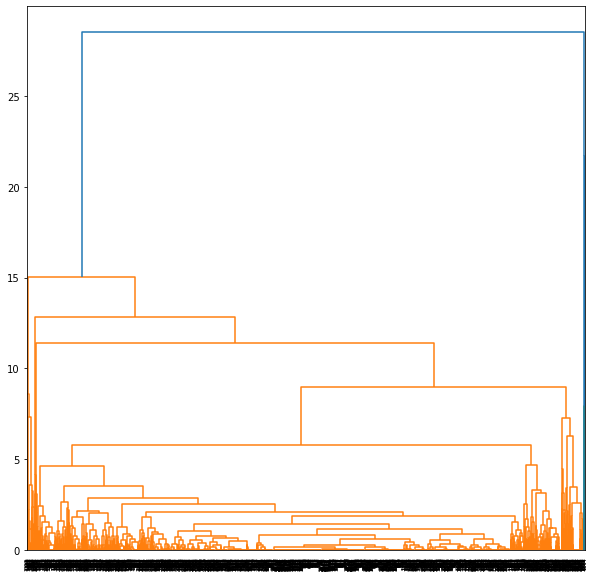

In [27]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df2_esc, method = 'complete')) #complete, single e ward (dados dispersos)

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao = hier.fit_predict(df2_esc)

In [30]:
classificacao

array([1, 1, 1, ..., 1, 1, 1])

Agrupamento

In [31]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,1
1,1
2,1
3,1
4,1
...,...
2198,1
2199,1
2200,1
2201,1


In [32]:
df_hc = pd.concat([df_aux, agrupamento],axis=1)
df_hc

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
0,2.0,5.0,6.0,10.0,Medicina,1
1,4.0,1.0,5.0,2.0,Medicina,1
2,4.0,4.0,5.0,5.0,Medicina,1
3,2.0,1.0,7.0,2.0,Medicina,1
4,3.0,1.0,6.0,2.0,Medicina,1
...,...,...,...,...,...,...
2198,1.0,2.0,1.0,3.0,Teologia,1
2199,1.0,1.0,1.0,3.0,Teologia,1
2200,1.0,1.0,1.0,3.0,Pedagogia,1
2201,1.0,2.0,1.0,9.0,Gestão da Qualidade,1


In [33]:
df_hc.loc[df_aux.curso_ofertado == 'Teologia']

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
1112,2.0,1.0,5.0,12.0,Teologia,1
2187,2.0,6.0,7.0,14.0,Teologia,1
2195,2.0,1.0,2.0,2.0,Teologia,1
2196,1.0,1.0,1.0,3.0,Teologia,1
2197,1.0,1.0,1.0,1.0,Teologia,1
2198,1.0,2.0,1.0,3.0,Teologia,1
2199,1.0,1.0,1.0,3.0,Teologia,1


In [34]:
grupo = df_hc.loc[df_hc.Grupo == 6]
grupo.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
180,15.0,4.0,5.0,95.0,Direito,6
